In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
file_path = os.path.join("data","covid")
csv_path = os.path.join(file_path,"WHO-COVID-19-global-data.csv")

In [5]:
df = pd.read_csv(csv_path)
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
70383,2020-10-23,ZW,Zimbabwe,AFRO,27,8242,0,236
70384,2020-10-24,ZW,Zimbabwe,AFRO,15,8257,0,236
70385,2020-10-25,ZW,Zimbabwe,AFRO,12,8269,0,236
70386,2020-10-26,ZW,Zimbabwe,AFRO,7,8276,1,237


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70388 entries, 0 to 70387
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date_reported       70388 non-null  object
 1    Country_code       70089 non-null  object
 2    Country            70388 non-null  object
 3    WHO_region         70388 non-null  object
 4    New_cases          70388 non-null  int64 
 5    Cumulative_cases   70388 non-null  int64 
 6    New_deaths         70388 non-null  int64 
 7    Cumulative_deaths  70388 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 4.3+ MB


In [6]:
df.columns = [col.strip() for col in df.columns]
df['Date'] = pd.to_datetime(df['Date_reported'], format='%Y-%m-%d')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70388 entries, 0 to 70387
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      70388 non-null  object        
 1   Country_code       70089 non-null  object        
 2   Country            70388 non-null  object        
 3   WHO_region         70388 non-null  object        
 4   New_cases          70388 non-null  int64         
 5   Cumulative_cases   70388 non-null  int64         
 6   New_deaths         70388 non-null  int64         
 7   Cumulative_deaths  70388 non-null  int64         
 8   Date               70388 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 4.8+ MB


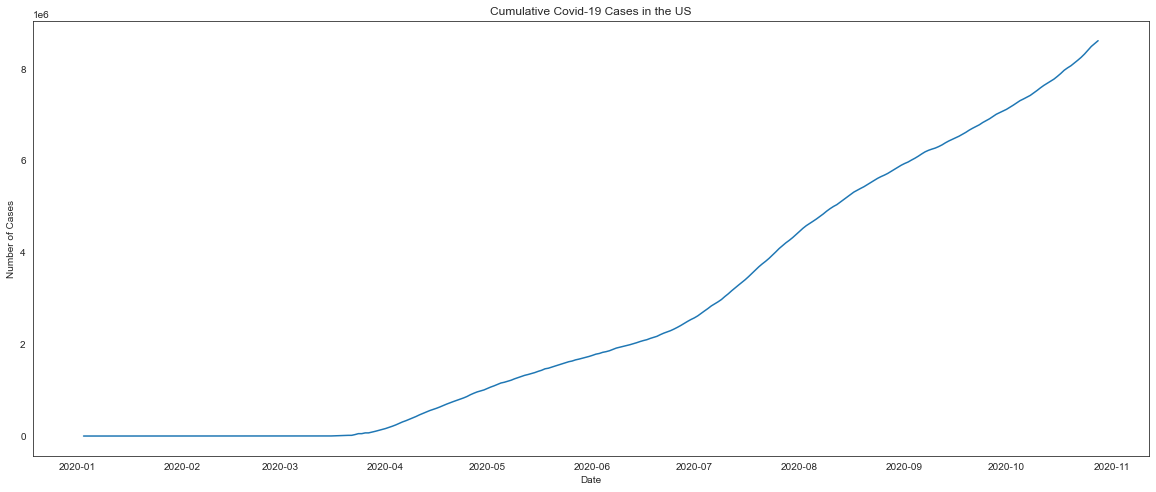

In [9]:
#sns.set(rc={'figure.figsize':(18, 8)}, style='white')

fig,ax = plt.subplots(figsize=(20, 8))
ax = sns.lineplot(data=df[(df['Country']=='United States of America')],  y='Cumulative_cases', x='Date')
sns.set_style("white")
#ax.set(yscale="log")
ax.grid(False)
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Date')
ax.set_title('Cumulative Covid-19 Cases in the US')

plt.show()

In [10]:
df.drop('Date',axis=1,inplace=True)
# Let's recheck the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70388 entries, 0 to 70387
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      70388 non-null  object
 1   Country_code       70089 non-null  object
 2   Country            70388 non-null  object
 3   WHO_region         70388 non-null  object
 4   New_cases          70388 non-null  int64 
 5   Cumulative_cases   70388 non-null  int64 
 6   New_deaths         70388 non-null  int64 
 7   Cumulative_deaths  70388 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 4.3+ MB


In [11]:
# Convert the Date_reported column to a datetime 
df.loc[:,'Date_reported'] = pd.to_datetime(df.Date_reported)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70388 entries, 0 to 70387
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      70388 non-null  datetime64[ns]
 1   Country_code       70089 non-null  object        
 2   Country            70388 non-null  object        
 3   WHO_region         70388 non-null  object        
 4   New_cases          70388 non-null  int64         
 5   Cumulative_cases   70388 non-null  int64         
 6   New_deaths         70388 non-null  int64         
 7   Cumulative_deaths  70388 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 4.3+ MB


In [14]:
#df["Date_reported"].describe()

## Sorting and Reindexing

In [15]:
df.sort_values(by='New_deaths', ascending=False).head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
67196,2020-04-17,US,United States of America,AMRO,28711,632781,6409,32280
67212,2020-05-03,US,United States of America,AMRO,26753,1093880,5000,67637
49345,2020-08-15,PE,Peru,AMRO,9441,507996,3935,25648
49323,2020-07-24,PE,Peru,AMRO,4463,366550,3876,17455
18221,2020-09-07,EC,Ecuador,AMRO,-8261,109784,3800,10524
2670,2020-10-03,AR,Argentina,AMRO,14001,765002,3351,20288
40410,2020-10-10,MX,Mexico,AMRO,30468,804488,3013,83096
67210,2020-05-01,US,United States of America,AMRO,31379,1035353,2902,60632
67218,2020-05-09,US,United States of America,AMRO,30204,1245775,2840,75364
67202,2020-04-23,US,United States of America,AMRO,24019,800926,2575,45042


In [16]:
df.sort_values(by='New_cases', ascending=False).head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
29009,2020-09-17,IN,India,SEARO,97894,5118253,1132,83198
29004,2020-09-12,IN,India,SEARO,97570,4659984,1201,77472
29003,2020-09-11,IN,India,SEARO,96551,4562414,1209,76271
29010,2020-09-18,IN,India,SEARO,96424,5214677,1174,84372
29002,2020-09-10,IN,India,SEARO,95735,4465863,1172,75062
29005,2020-09-13,IN,India,SEARO,94372,4754356,1114,78586
29011,2020-09-19,IN,India,SEARO,93337,5308014,1247,85619
29012,2020-09-20,IN,India,SEARO,92605,5400619,1133,86752
29006,2020-09-14,IN,India,SEARO,92071,4846427,1136,79722
28999,2020-09-07,IN,India,SEARO,90802,4204613,1016,71642


In [17]:
df.nlargest(n=10, columns='New_deaths')

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
67196,2020-04-17,US,United States of America,AMRO,28711,632781,6409,32280
67212,2020-05-03,US,United States of America,AMRO,26753,1093880,5000,67637
49345,2020-08-15,PE,Peru,AMRO,9441,507996,3935,25648
49323,2020-07-24,PE,Peru,AMRO,4463,366550,3876,17455
18221,2020-09-07,EC,Ecuador,AMRO,-8261,109784,3800,10524
2670,2020-10-03,AR,Argentina,AMRO,14001,765002,3351,20288
40410,2020-10-10,MX,Mexico,AMRO,30468,804488,3013,83096
67210,2020-05-01,US,United States of America,AMRO,31379,1035353,2902,60632
67218,2020-05-09,US,United States of America,AMRO,30204,1245775,2840,75364
67202,2020-04-23,US,United States of America,AMRO,24019,800926,2575,45042


In [18]:
# We can re index - our original index is now a column called index
df[df["Country"] == "United States of America"].sort_values(by='New_cases', ascending=False).head(10).reset_index()

,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,67387,2020-10-25,US,United States of America,AMRO,82630,8403121,943,222507
1,67388,2020-10-26,US,United States of America,AMRO,82626,8485747,821,223328
2,67289,2020-07-19,US,United States of America,AMRO,74354,3618497,917,138591
3,67296,2020-07-26,US,United States of America,AMRO,74235,4084043,1135,144798
4,67386,2020-10-24,US,United States of America,AMRO,72342,8320491,1001,221564
5,67295,2020-07-25,US,United States of America,AMRO,71714,4009808,1110,143663
6,67288,2020-07-18,US,United States of America,AMRO,71484,3544143,921,137674
7,67380,2020-10-18,US,United States of America,AMRO,69834,7966729,998,217071
8,67294,2020-07-24,US,United States of America,AMRO,69641,3938094,1074,142553
9,67302,2020-08-01,US,United States of America,AMRO,67823,4456389,1211,151265


In [19]:
# We can change the index from the existing one to a date index
df.set_index('Date_reported', inplace=True)

In [20]:
df

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...
2020-10-23,ZW,Zimbabwe,AFRO,27,8242,0,236
2020-10-24,ZW,Zimbabwe,AFRO,15,8257,0,236
2020-10-25,ZW,Zimbabwe,AFRO,12,8269,0,236


In [21]:
df['2020-03-01':'2020-03-25']

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-03-01,AF,Afghanistan,EMRO,0,5,0,0
2020-03-02,AF,Afghanistan,EMRO,0,5,0,0
2020-03-03,AF,Afghanistan,EMRO,0,5,0,0
2020-03-04,AF,Afghanistan,EMRO,0,5,0,0
2020-03-05,AF,Afghanistan,EMRO,0,5,0,0
...,...,...,...,...,...,...,...
2020-03-21,ZW,Zimbabwe,AFRO,1,2,0,0
2020-03-22,ZW,Zimbabwe,AFRO,0,2,0,0
2020-03-23,ZW,Zimbabwe,AFRO,0,2,0,0


In [22]:
df["2020-04"]

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-04-01,AF,Afghanistan,EMRO,26,192,0,4
2020-04-02,AF,Afghanistan,EMRO,43,235,0,4
2020-04-03,AF,Afghanistan,EMRO,34,269,1,5
2020-04-04,AF,Afghanistan,EMRO,1,270,0,5
2020-04-05,AF,Afghanistan,EMRO,29,299,2,7
...,...,...,...,...,...,...,...
2020-04-26,ZW,Zimbabwe,AFRO,2,31,0,4
2020-04-27,ZW,Zimbabwe,AFRO,0,31,0,4
2020-04-28,ZW,Zimbabwe,AFRO,0,31,0,4


In [23]:
df['2020-Q2']

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-04-01,AF,Afghanistan,EMRO,26,192,0,4
2020-04-02,AF,Afghanistan,EMRO,43,235,0,4
2020-04-03,AF,Afghanistan,EMRO,34,269,1,5
2020-04-04,AF,Afghanistan,EMRO,1,270,0,5
2020-04-05,AF,Afghanistan,EMRO,29,299,2,7
...,...,...,...,...,...,...,...
2020-06-26,ZW,Zimbabwe,AFRO,21,551,0,6
2020-06-27,ZW,Zimbabwe,AFRO,10,561,1,7
2020-06-28,ZW,Zimbabwe,AFRO,6,567,0,7


In [26]:
df.assign(week_day=lambda x: x.index.day_name())

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,week_day
Date_reported,,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,Friday
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,Saturday
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,Sunday
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,Monday
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,Tuesday
...,...,...,...,...,...,...,...,...
2020-10-23,ZW,Zimbabwe,AFRO,27,8242,0,236,Friday
2020-10-24,ZW,Zimbabwe,AFRO,15,8257,0,236,Saturday
2020-10-25,ZW,Zimbabwe,AFRO,12,8269,0,236,Sunday


In [27]:
df_temp = df["2020-4"]
df_temp[(df_temp.Country_code == 'US')]

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-04-01,US,United States of America,AMRO,22559,163199,452,2850
2020-04-02,US,United States of America,AMRO,24103,187302,996,3846
2020-04-03,US,United States of America,AMRO,26298,213600,947,4793
2020-04-04,US,United States of America,AMRO,28103,241703,1061,5854
2020-04-05,US,United States of America,AMRO,32105,273808,1166,7020
2020-04-06,US,United States of America,AMRO,33510,307318,1338,8358
2020-04-07,US,United States of America,AMRO,26493,333811,1201,9559
2020-04-08,US,United States of America,AMRO,29510,363321,1286,10845
2020-04-09,US,United States of America,AMRO,31709,395030,1895,12740


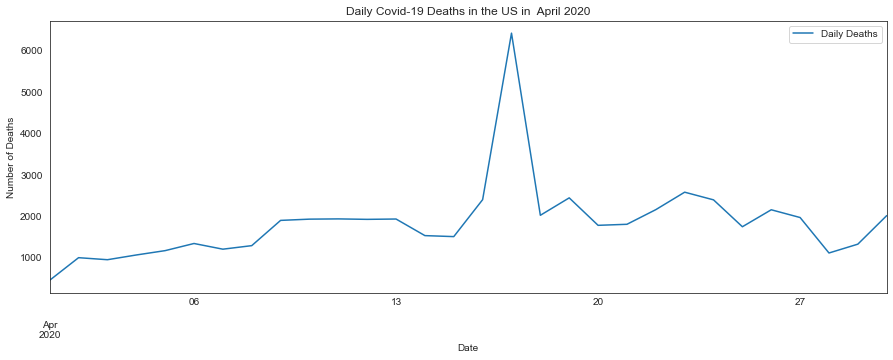

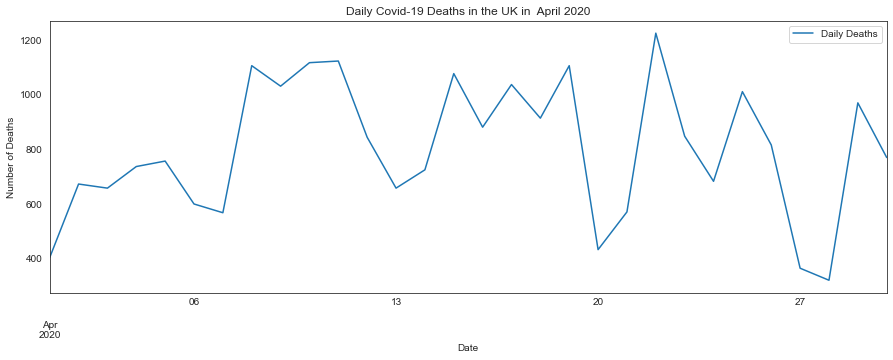

In [28]:
df_temp[(df_temp.Country_code == 'US')].plot(
     y='New_deaths', figsize=(15, 5), label='Daily Deaths',
     title='Daily Covid-19 Deaths in the US in  '\
         'April 2020')
plt.xlabel('Date')
plt.ylabel('Number of Deaths') # label axes
df_temp[(df_temp.Country_code == 'GB')].plot(
     y='New_deaths', figsize=(15, 5), label='Daily Deaths',
     title='Daily Covid-19 Deaths in the UK in  '\
         'April 2020')

plt.xlabel('Date')
plt.ylabel('Number of Deaths') # label axes
plt.show()

### Move this section to new notebook

In [ ]:
print("Pandas Version:", pd.__version__)

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [ ]:
# Define a function that should color the values that are less than 0 
def colorNegativeValueToRed(value):
  if value < 0:
    color = 'red'
  elif value > 0:
    color = 'black'
  else:
    color = 'green'

  return 'color: %s' % color

In [ ]:
s = df.style.applymap(colorNegativeValueToRed, subset=['A','B','C','D','E'])
def highlightMax(s):
    isMax = s == s.max()
    return ['background-color: orange' if v else '' for v in isMax]

def highlightMin(s):
    isMin = s == s.min()
    return ['background-color: green' if v else '' for v in isMin] 

In [ ]:
import seaborn as sns

colorMap = sns.light_palette("pink", as_cmap=True)

styled = df.style.background_gradient(cmap=colorMap)
styled